# Collection Analysis with Open Collections API

## Text Mining

First we are going to start off with text mining using the Open Collections API

In [29]:
import json, requests, math, re, string, nltk

# allow matplotlib to run in-line
% matplotlib inline 

nltk.download("punkt") # Word tokenizer
nltk.download("stopwords") # Stop words
from nltk import word_tokenize

ocUrl = 'https://open.library.ubc.ca/'
ocApiUrl = 'https://oc-index.library.ubc.ca' # APPY URL

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Set our API Key

You can get your own API key at https://open.library.ubc.ca/research

In [8]:
apiKey = 'ac40e6c2cb345593ed1691e0a8b601bba398e42d85f81f893c5ab709cec63c6c'

### Choose a collection

In [9]:
collection = 'darwin'

### Get collection info using the API

In [10]:
# Query the API for the collection information
collectionUrl = ocApiUrl+'/collections/'+collection+'?api_key='+apiKey
apiResponse = requests.get(collectionUrl).json()

# Get count of items in collection
itemCount = apiResponse['data']['items']

# Get collection name
collectionTitle = apiResponse['data']['title']
'Collection: "' + collectionTitle + '" has ' + str(itemCount) + ' items'

'Collection: "Charles Darwin Letters" has 52 items'

### GET and store the collections items using the API

In [11]:
perPage = 25
offset = 0
pages = math.ceil(itemCount / 25)

# Loop through collection item pages to get all items
itemIds = []
for x in range(0, pages):
    collectionItemsUrl = ocApiUrl+'/collections/'+collection
    collectionItemsUrl += '/items?limit='+str(perPage)+'&offset='+str(offset)+'&api_key='+apiKey
    offset += 25 
    # Get list of 25 items
    apiResponse = requests.get(collectionItemsUrl).json()
    collectionItems = apiResponse['data']
    # Add each item id to the itemIds list
    for collectionItem in collectionItems:
        itemIds.append(collectionItem['_id'])
print(itemIds)

['1.0000079', '1.0000080', '1.0000084', '1.0000088', '1.0000093', '1.0000097', '1.0000103', '1.0000130', '1.0000134', '1.0000138', '1.0000143', '1.0000147', '1.0000152', '1.0000083', '1.0000087', '1.0000092', '1.0000096', '1.0000102', '1.0000133', '1.0000137', '1.0000142', '1.0000146', '1.0000151', '1.0000082', '1.0000086', '1.0000091', '1.0000095', '1.0000099', '1.0000101', '1.0000132', '1.0000136', '1.0000141', '1.0000145', '1.0000149', '1.0000150', '1.0000154', '1.0000200', '1.0000081', '1.0000085', '1.0000089', '1.0000090', '1.0000094', '1.0000098', '1.0000100', '1.0000104', '1.0000131', '1.0000135', '1.0000139', '1.0000140', '1.0000144', '1.0000148', '1.0000153']


### GET and store items and full text using the API

In [12]:
items = []
fullTexts = []
for itemId in itemIds : 
    itemUrl = ocApiUrl+'/collections/'+collection+'/items/'+itemId
    apiResponse = requests.get(itemUrl).json()
    item = apiResponse['data']
    easyItem = dict()
    easyItem['id'] = itemId
    easyItem['title'] = item['Title'][0]['value']
    if 'FullText' in item:
        fullText = item['FullText'][0]['value']
        # Lower case full text
        cleanFullText = fullText.lower()
        # Remove everything but words
        pattern = re.compile('[\W_]+')
        cleanFullText = pattern.sub(' ', cleanFullText)
        # Add to the full texts list
        fullTexts.append(cleanFullText)
        easyItem['fullText'] = item['FullText'][0]['value']
    else:
        easyItem['fullText'] = ''
        fullTexts.append('')
        
    items.append(easyItem)
        
print(fullTexts)

['down beckenham kent my dear dr sanderson i hear from frank the drosera has been behaving perversely i write a line as it may possibly have a bearing on this perversity viz that the motor influence is sent from the excited gland more quickly completely in a longitudinal than in a transverse direction in the laminae of the leaf diagram with labels longitudinal transverse direction footstalk yours very sincerely ch darwin', 'to try whether mucin made by dr moore from a large quantity of mucin globulin from lens of eye chlorophyll now in alcohol to be evaporated hemoglobin can be digested is chondrin more nutritious or more digestible than gelatin dr moore says it is more nutritious it acts more efficiently on drosera than does gelatin but neither of them acts so efficiently as juice of raw meat or meat or albumen etc etc on side if not generally known likely dr brunton would know if i can get propionic butyric acids will it be troublesome to ascertain whether these with pepsin will dige

## Natural Language Processing

Now that we've done the boring part of just getting the items and full text we can start to process the full text and perform analysis on it

### Total character count

In [13]:
characterLength = 0
for fullText in fullTexts:
    characterLength += len(fullText)
print(characterLength)

58945


### Total word count

In [14]:
totalTokens = []

c = 0
for fullText in fullTexts:
    tokenisedText = word_tokenize(fullText)
    totalTokens += tokenisedText
    items[c]['words'] = tokenisedText
    c = c + 1
#print(tokens)
len(totalTokens)

11156

### Item with most words?

In [15]:
#print(items[0]['words'])

highestWordCount = 0;
highestId= 0;

for key, item in enumerate(items):
    if(len(item['words']) > highestWordCount):
        highestWordCount = len(item['words'])
        highestId = key

print(ocUrl+collection+'/items/'+items[highestId]['id'] + ' has the most words with ' + str(highestWordCount) + ' words')

https://open.library.ubc.ca/darwin/items/1.0000103 has the most words with 615 words


### Total unique word count

In [16]:
len(set(totalTokens)) #todo paste what set does

2182

### Item with most unique words?

In [17]:
uniqueWordCount = 0;
winner = 0;

for key, item in enumerate(items):
    if(len(set(item['words'])) > uniqueWordCount):
        uniqueWordCount = len(set(item['words']))
        winner = key

print(ocUrl+collection+'/items/'+items[highestId]['id'] + ' has the most words with ' + str(uniqueWordCount) + ' unique words')

https://open.library.ubc.ca/darwin/items/1.0000103 has the most words with 297 unique words


### Longest words

In [18]:
v = set(totalTokens)
long_words = [word for word in v if len(word) > 13]
sorted(long_words)

['acknowledgment',
 'affectionately',
 'afterconversation',
 'circumferential',
 'consequentially',
 'correspondence',
 'darwinenvelope',
 'demonstrations',
 'dissolvedecalcified',
 'experimentation',
 'fibrocartilage',
 'highlypeculiar',
 'intelligibility',
 'misconstruction',
 'notwithstanding',
 'physiologically',
 'somethingabout',
 'sufficientlystruck',
 'superintendence',
 'transmissionor',
 'youmisunderstood']

### Collocations

In [19]:
# Get sequence of words or terms that co-occur more often than would be expected by chance. 
text = nltk.Text(totalTokens)
text.collocations()

beckenham kent; queen anne; fibrous basis; fibro cartilage; anne
street; fatty acids; gastric juice; railway station; station
orpington; old friend; charles darwin; son frank; sandown isle;
sincerely charles; brit assoc; digestive fluid; broadlands sandown;
kent railway; heat rigor; much obliged


### Frequency Distributions

In [23]:
from nltk import FreqDist
fdist = FreqDist(text)
fdist.most_common(50)

[('the', 452),
 ('i', 413),
 ('to', 351),
 ('of', 330),
 ('a', 192),
 ('that', 176),
 ('it', 165),
 ('you', 154),
 ('in', 152),
 ('is', 137),
 ('have', 124),
 ('as', 113),
 ('my', 110),
 ('not', 109),
 ('be', 108),
 ('on', 100),
 ('me', 96),
 ('for', 93),
 ('very', 83),
 ('with', 80),
 ('will', 80),
 ('but', 66),
 ('by', 66),
 ('which', 64),
 ('this', 63),
 ('if', 63),
 ('and', 62),
 ('your', 60),
 ('dear', 59),
 ('or', 55),
 ('at', 53),
 ('he', 53),
 ('darwin', 51),
 ('was', 51),
 ('had', 49),
 ('much', 48),
 ('so', 47),
 ('yours', 46),
 ('mr', 46),
 ('would', 45),
 ('drosera', 44),
 ('sanderson', 44),
 ('has', 42),
 ('think', 42),
 ('are', 40),
 ('dr', 39),
 ('his', 39),
 ('s', 38),
 ('can', 38),
 ('do', 38)]

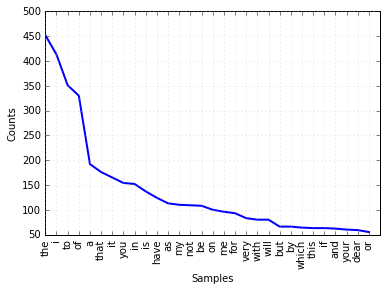

In [35]:
# Now we can plot the frequency distributions
fdist.plot(30)